# EDA - Loan Dataset

## Data Understanding, Cleaning and Manipulation

In [8]:
import pandas as pd

# Load the loan dataset
loan = pd.read_csv(r"C:\Users\ankit\Desktop\upGrad\Course 2\Case - Lending Club\loan.csv", low_memory=False)

#Displaying few rows of the dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
#Check for missing data in each columns
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
#Dropping columns having all NaN values
loan.dropna(axis='columns', how='all', inplace=True)

#Displaying few rows of the reduced dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
#Check for missing data in remaining columns
loan.isna().sum().sort_values(ascending=False).head(10)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
dtype: int64

###Analysing the top 4 columns with highest number of NaN values to find relevance or eliminate the column

1. next_pymnt_d: It is the next sceduled date of payment

In [16]:
# Creating a dataset with loan_status and next_pymnt_d columns to check its relevance
loan_nextpayment = loan[['loan_status','next_pymnt_d']]

#Creatinbg a new column which tells us if next payment date is available or not for each record
loan_nextpayment['data_available'] = loan_nextpayment.next_pymnt_d.apply(lambda x: 0 if pd.isnull(x)==True else 1)

#Creating a crosstable
nextpayment_cross_tab = pd.crosstab(loan_nextpayment.data_available, loan_nextpayment.loan_status)
nextpayment_cross_tab

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\23376089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_nextpayment['data_available'] = loan_nextpayment.next_pymnt_d.apply(lambda x: 0 if pd.isnull(x)==True else 1)


loan_status,Charged Off,Current,Fully Paid
data_available,,,
0,5627,0,32950
1,0,1140,0


Conclusion: Irrelevant column since next payment date is only available for current running loan account

In [19]:
#dropping the irrelevant column
loan.drop('next_pymnt_d', axis='columns', inplace=True)

2. mths_since_last_record: It is the number of months since the last public record

In [20]:
# Creating a dataset with mths_since_last_record and next_pymnt_d columns to check its relevance
loan_lastrecord = loan[['loan_status','mths_since_last_record']]

#Creatinbg a new column which tells us if month since last record data is available or not for each record
loan_lastrecord['data_available'] = loan_lastrecord.mths_since_last_record.apply(lambda x: 0 if pd.isnull(x)==True else 1)

#Creating a crosstable
lastrecord_cross_tab = pd.crosstab(loan_lastrecord.data_available, loan_lastrecord.loan_status)
lastrecord_cross_tab

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\631391158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_lastrecord['data_available'] = loan_lastrecord.mths_since_last_record.apply(lambda x: 0 if pd.isnull(x)==True else 1)


loan_status,Charged Off,Current,Fully Paid
data_available,,,
0,5049,1094,30788
1,578,46,2162


Conclusion: month since last record is not available for current running loan account as well which makes this column unreliable

In [21]:
#dropping the irrelevant column
loan.drop('mths_since_last_record', axis='columns', inplace=True)

3. mths_since_last_delinq: The number of months since the borrower's last delinquency

In [22]:
# Creating a dataset with mths_since_last_delinq and next_pymnt_d columns to check its relevance
loan_lastdelinq = loan[['loan_status','mths_since_last_delinq']]

#Creatinbg a new column which tells us if month since last record data is available or not for each record
loan_lastdelinq['data_available'] = loan_lastdelinq.mths_since_last_delinq.apply(lambda x: 0 if pd.isnull(x)==True else 1)

#Creating a crosstable
lastdelinq_cross_tab = pd.crosstab(loan_lastdelinq.data_available, loan_lastdelinq.loan_status)
lastdelinq_cross_tab

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\3169754249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_lastdelinq['data_available'] = loan_lastdelinq.mths_since_last_delinq.apply(lambda x: 0 if pd.isnull(x)==True else 1)


loan_status,Charged Off,Current,Fully Paid
data_available,,,
0,3485,777,21420
1,2142,363,11530


Conclusion: month since last delinq is not available for current running loan account as well which makes this column unreliable

In [23]:
#dropping the irrelevant column
loan.drop('mths_since_last_delinq', axis='columns', inplace=True)

4. desc: Loan description provided by the borrower

In [25]:
# Creating a dataset with desc and next_pymnt_d columns to check its relevance
loan_desc = loan[['loan_status','desc']]

#Creatinbg a new column which tells us if the descriptiona is available or not for each record
loan_desc['data_available'] = loan_desc.desc.apply(lambda x: 0 if pd.isnull(x)==True else 1)

#Creating a crosstable
desc_cross_tab = pd.crosstab(loan_desc.data_available, loan_desc.loan_status)
desc_cross_tab

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\3653842766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_desc['data_available'] = loan_desc.desc.apply(lambda x: 0 if pd.isnull(x)==True else 1)


loan_status,Charged Off,Current,Fully Paid
data_available,,,
0,1802,413,10725
1,3825,727,22225


In [27]:
# Column to check wether % customer charged off changes if description is available
desc_cross_tab['% charged off'] = desc_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2]),2), axis=1)
desc_cross_tab

loan_status,Charged Off,Current,Fully Paid,% charged off
data_available,,,,
0,1802,413,10725,0.14
1,3825,727,22225,0.14


Conclusion: availability of description doesnot have any effect on % of people charged off, which makes 'desc' irrelevant

In [28]:
#dropping the irrelevant column
loan.drop('desc', axis='columns', inplace=True)

In [33]:
# Replacing emp_title column with categorical column
loan['emp_title_available'] = loan.emp_title.apply(lambda x: 0 if pd.isnull(x)==True else 1)

#Dropping emp_title column
loan.drop('emp_title', axis='columns', inplace=True)

In [35]:
# Replacing NaN values in emp_length column with "Not Available" string
loan['emp_length'] = loan.emp_length.apply(lambda x: "Not Available" if pd.isnull(x)==True else x)

In [38]:
# Replacing NaN values in pub_rec_bankruptcies column with "Not Available" string
loan['pub_rec_bankruptcies'] = loan.pub_rec_bankruptcies.apply(lambda x: "Not Available" if pd.isnull(x)==True else x)

In [39]:
#Check for missing data in remaining columns
loan.isna().sum().sort_values(ascending=False).head(10)

last_pymnt_d                  71
chargeoff_within_12_mths      56
collections_12_mths_ex_med    56
revol_util                    50
tax_liens                     39
title                         11
last_credit_pull_d             2
id                             0
total_rec_int                  0
total_acc                      0
dtype: int64

In [40]:
#Dropping the remaining rows with NaN values
loan.dropna(inplace=True)

In [43]:
#Checking only for unique values in id and member_id columns
loan.drop_duplicates(subset=['id','member_id'], inplace=True)

#Dropping id and member_id columns as they are irrelevant
loan.drop(['id','member_id'], axis='columns', inplace=True)

In [44]:
#Final check for NaN values
loan.isna().sum().sort_values(ascending=False).head()

loan_amnt                  0
collection_recovery_fee    0
total_acc                  0
initial_list_status        0
out_prncp                  0
dtype: int64

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Analysis - Univariate & Bivariate Analysis

1. funded_amnt: The total amount committed to that loan at that point in time

<Axes: xlabel='funded_amnt', ylabel='loan_status'>

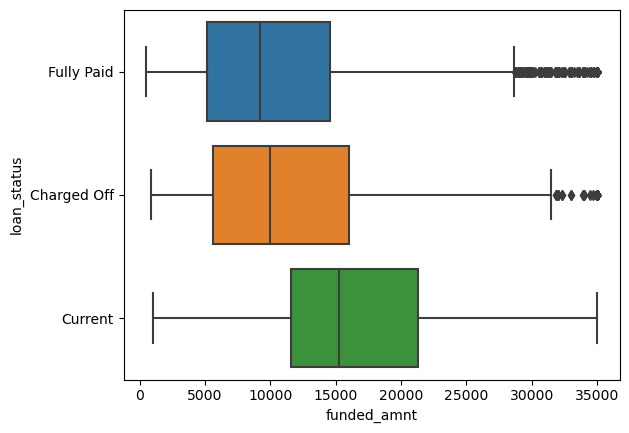

In [46]:
# Creating a new DataFrame 
loan_funded = loan[['loan_status','funded_amnt']]

#Boxplot to check impact of funded amount on loan status
sns.boxplot(data=loan_funded, x="funded_amnt", y="loan_status")

Conclusion: The 25th percentile, mean and 75th percentile of funded amount is similar for both "Fully Paid" and "Charged Off" loan. This indicates that the funded amount doesnot affect loan status

2. term: Tenure of the loan either 36 months or 60 months

In [48]:
# Creating a new DataFrame 
loan_term = loan[['loan_status','term']]

#Calculating the frequency table of both variables to summarise the distribution of data
term_cross_tab = pd.crosstab(loan_term.term, loan_term.loan_status)

#Calculating % people charged off for each row 
term_cross_tab['% Charged Off'] = term_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2])*100,2), axis=1)
term_cross_tab

loan_status,Charged Off,Current,Fully Paid,% Charged Off
term,,,,
36 months,3157,0,25777,10.91
60 months,2378,1140,7079,22.44


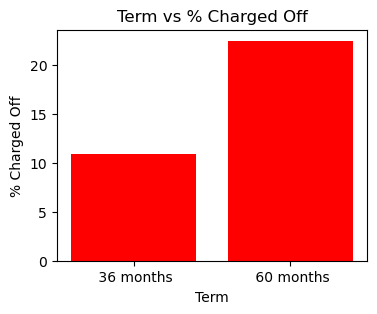

In [52]:
plt.figure(figsize=(4,3))
plt.bar(term_cross_tab.index, term_cross_tab['% Charged Off'], color='red')
plt.xlabel('Term')
plt.ylabel('% Charged Off')
plt.title('Term vs % Charged Off')
plt.show()

Conclusion: Loans with high duration has higher chance of default

3. int_rate: Interest rate on the loan

In [54]:
# Creating a new DataFrame 
loan_interest = loan[['loan_status','int_rate']]

#Checking data types of both column
loan_interest.dtypes

loan_status    object
int_rate       object
dtype: object

In [55]:
#Removing % sign from each value in the column int_rate and converting the values into 'float' datatype
loan_interest['rate'] = loan_interest.int_rate.apply(lambda x: x[:-1]).astype(float)

#Dropping int_rate column
loan_interest.drop('int_rate', axis=1, inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\549767314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_interest['rate'] = loan_interest.int_rate.apply(lambda x: x[:-1]).astype(float)
C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\549767314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_interest.drop('int_rate', axis=1, inplace=True)


<Axes: xlabel='rate', ylabel='loan_status'>

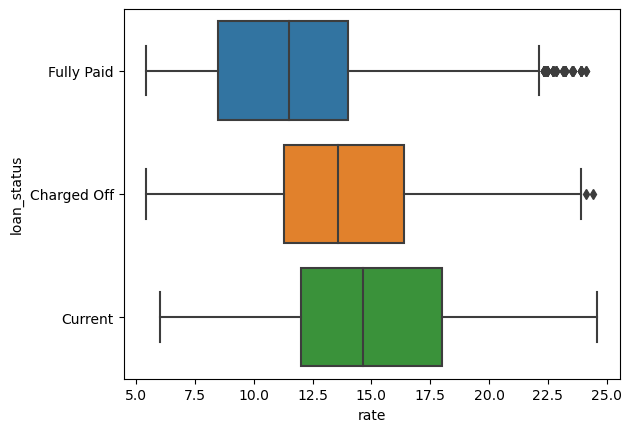

In [56]:
#Boxplot to check impact of interest rate on loan status
sns.boxplot(data=loan_interest, x="rate", y="loan_status")

Conclusion: Default loans have higher mean interest rate as compared to loans fully paid

4. grade: Grade of loan assigned by LC

In [60]:
# Creating a new DataFrame 
loan_grade = loan[['loan_status','grade']]

#Calculating the frequency table of both variables to summarise the distribution of data
grade_cross_tab = pd.crosstab(loan_grade['grade'], loan_grade['loan_status'])

#Calculating % people charged off for each loan grade
grade_cross_tab['% charged off'] = grade_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2])*100,2), axis=1)
grade_cross_tab

loan_status,Charged Off,Current,Fully Paid,% charged off
grade,,,,
A,596,40,9420,5.93
B,1408,345,10233,11.75
C,1316,264,6466,16.36
D,1101,222,3948,20.89
E,702,179,1939,24.89
F,315,73,652,30.29
G,97,17,198,31.09


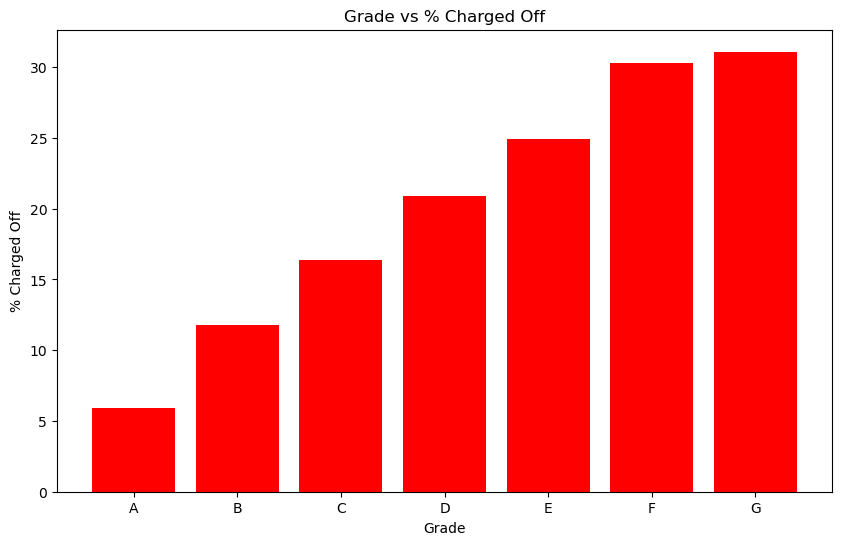

In [62]:
#Bar chart to show impact of grade on % loan charged off
plt.figure(figsize=(10,6))
plt.bar(grade_cross_tab.index, grade_cross_tab['% charged off'], color='red')
plt.xlabel('Grade')
plt.ylabel('% Charged Off')
plt.title('Grade vs % Charged Off')
plt.show()

Conclusion: Lower grade loans have higher chances of default as compared to better grade loans

5. emp_title: Job title of the borrower mentioned at the time of loan application

In [68]:
# Creating a new DataFrame 
loan_emptitle = loan[['loan_status','emp_title_available']]
loan_emptitle['emp_title_available'] = loan_emptitle.emp_title_available.apply(lambda x: "Available" if x==1 else "Not Available")
#Calculating the frequency table of both variables to summarise the distribution of data
emptitle_cross_tab = pd.crosstab( loan_emptitle.emp_title_available, loan_emptitle.loan_status)

#Calculating % people charged off for each row
emptitle_cross_tab['% charged off'] = emptitle_cross_tab.apply(lambda x: x[0]/(x[0]+x[1]+x[2])*100, axis=1)
emptitle_cross_tab

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\865301912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_emptitle['emp_title_available'] = loan_emptitle.emp_title_available.apply(lambda x: "Available" if x==1 else "Not Available")


loan_status,Charged Off,Current,Fully Paid,% charged off
emp_title_available,,,,
Available,5061,1067,30968,13.642980
Not Available,474,73,1888,19.466119


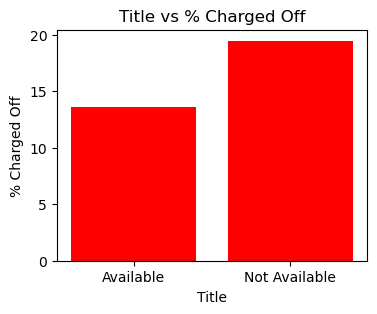

In [70]:
#Bar chart to show impact of availability of employee title on % loan charged off
plt.figure(figsize=(4,3))
plt.bar(emptitle_cross_tab.index, emptitle_cross_tab['% charged off'], color='red')
plt.xlabel('Title')
plt.ylabel('% Charged Off')
plt.title('Title vs % Charged Off')
plt.show()

Conclusion: Loan has higher chances of default when employee title is not furnished during loan application

6. emp_length: Employment length in years which vary between 0 and 10

In [72]:
# Creating a new DataFrame 
loan_emplength = loan[['loan_status','emp_length']]

#Calculating the frequency table of both variables to summarise the distribution of data
emplength_cross_tab = pd.crosstab(loan_emplength.emp_length, loan_emplength.loan_status)
emplength_cross_tab

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,443,71,2700
10+ years,1321,391,7153
2 years,558,97,3715
3 years,548,83,3449
4 years,453,94,2869
5 years,447,88,2729
6 years,303,61,1858
7 years,262,62,1442
8 years,199,44,1229


In [77]:
##Calculating % people charged off for each row
emplength_cross_tab['% charged off'] = emplength_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2])*100,2), axis=1)

#Re-indexing cross table to shuffle data in logical order
emplength_cross_tab = emplength_cross_tab.reindex(['Not Available','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

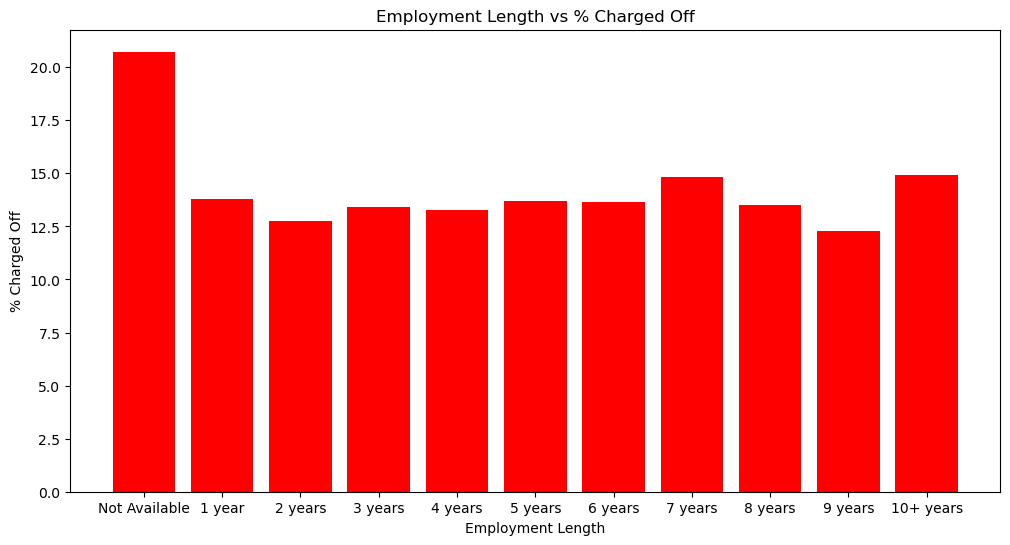

In [78]:
plt.figure(figsize=(12,6))
plt.bar(emplength_cross_tab.index, emplength_cross_tab['% charged off'], color='red')
plt.xlabel('Employment Length')
plt.ylabel('% Charged Off')
plt.title('Employment Length vs % Charged Off')
plt.show()

Conclusion: Loan application without employment length has higher chances of default. Further, employment length doesnot impact loan default

7. installment: Monthly payment to be paid

   annual_inc: Annual income of the borrower

In [81]:
# Creating a new DataFrame 
loan_income = loan[['loan_status','installment','annual_inc']]

#Calculating the percentage of annual income to be paid as installment by the borrower
loan_income['install%'] = loan_income.apply(lambda x: x[1]/x[2]*100, axis=1)

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\2867195363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_income['install%'] = loan_income.apply(lambda x: x[1]/x[2]*100, axis=1)


<Axes: xlabel='install%', ylabel='loan_status'>

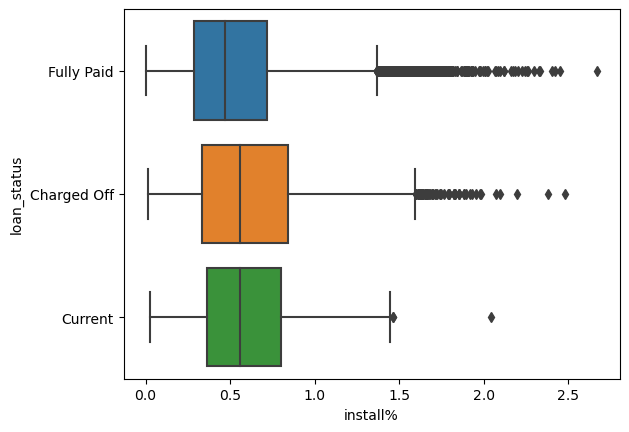

In [82]:
sns.boxplot(data=loan_income, x="install%", y="loan_status")

Conclusion: Borrowers who defaulted had a higher mean % of total income to be paid as installment

8. verification_status: Indicates if income of borrower was verified

In [84]:
# Creating a new DataFrame
loan_verification = loan[['loan_status','verification_status']]

#Calculating the frequency table of both variables to summarise the distribution of data
verification_cross_tab = pd.crosstab(loan_verification.verification_status, loan_verification.loan_status)

#Calculating % people charged off for each row
verification_cross_tab['% charged off'] = verification_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2]),2), axis=1)

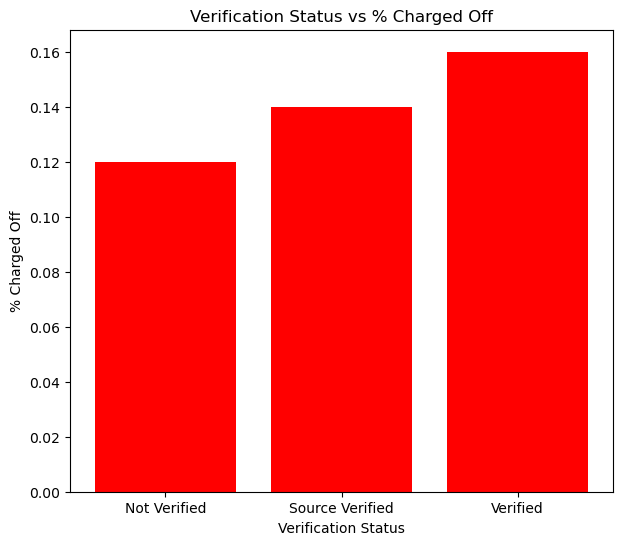

In [86]:
plt.figure(figsize=(7,6))
plt.bar(verification_cross_tab.index, verification_cross_tab['% charged off'], color='red')
plt.xlabel('Verification Status')
plt.ylabel('% Charged Off')
plt.title('Verification Status vs % Charged Off')
plt.show()

Conclusion: Counterintutively, individuals with verified income has higher chances of default

9. purpose: Purpose of requesting for loan

In [87]:
# Creating a new DataFrame
loan_purpose = loan[['loan_status','purpose']]

#Calculating the frequency table of both variables to summarise the distribution of data
purpose_cross_tab = pd.crosstab(loan_purpose.purpose, loan_verification.loan_status)
purpose_cross_tab['% charged off'] = purpose_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2]),2), axis=1)

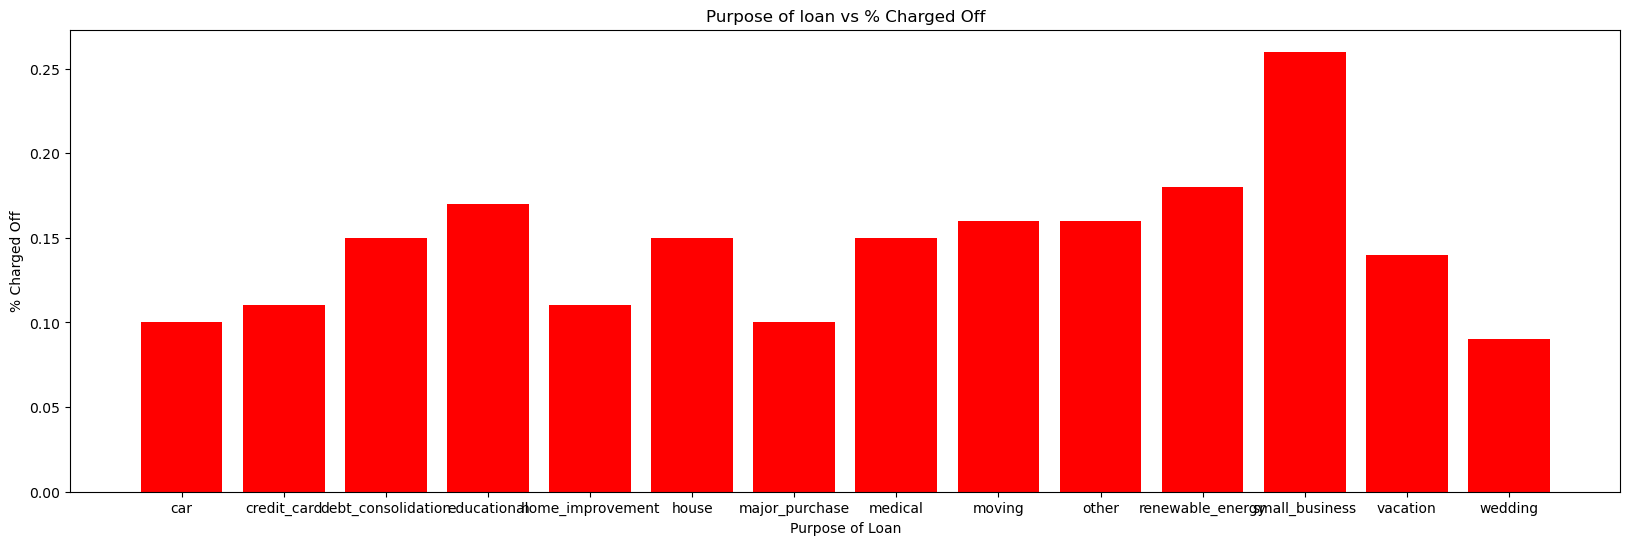

In [88]:
plt.figure(figsize=(20,6))
plt.bar(purpose_cross_tab.index, purpose_cross_tab['% charged off'], color='red')
plt.xlabel('Purpose of Loan')
plt.ylabel('% Charged Off')
plt.title('Purpose of loan vs % Charged Off')
plt.show()

Conclusion: Individuals borrowing for small business tends to default more

10. dti: Ratio of borrower's total monthly debt payment, divided by monthly income

In [90]:
from scipy import stats
loan_dti = loan[['loan_status','dti']]
dti_cross_tab = pd.crosstab(loan_dti.dti, loan_dti.loan_status)
loan_dti = loan_dti[abs(stats.zscore(loan_dti.dti)) <= 3]
dti_group = dti_cross_tab.groupby(pd.cut(dti_cross_tab.index,[0,5,10,15,20, 25,30])).sum()
dti_group['% charged off'] = dti_group.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2]),2), axis=1)

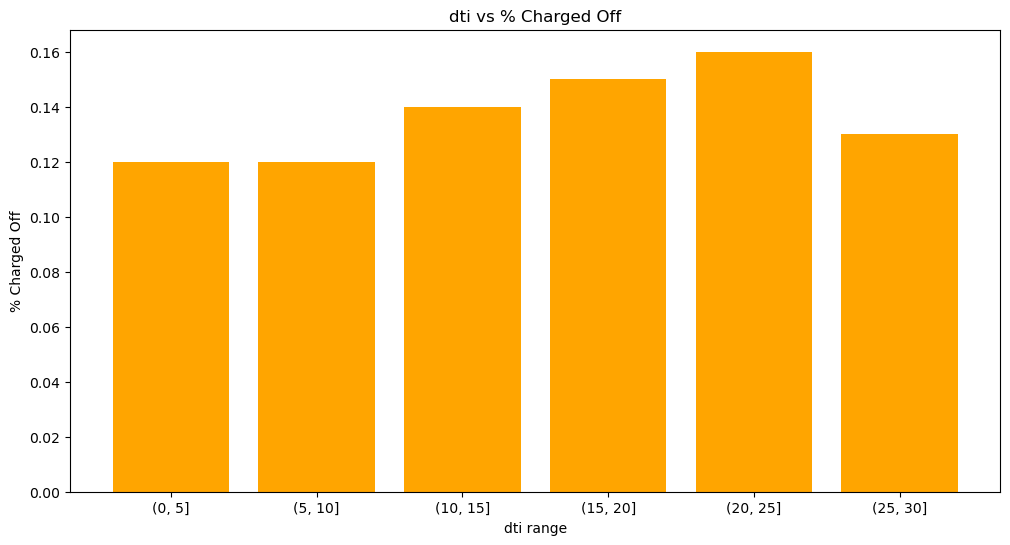

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(dti_group.index.astype(str), dti_group['% charged off'], color='orange')
plt.xlabel('dti range')
plt.ylabel('% Charged Off')
plt.title('dti vs % Charged Off')
plt.show()

Conclusion: Individuals with higher 'dti' has higher chance of default. However, the trend reverses for dti greater than 25

11. inq_last_6mths: No. of enquiries in the last 6 months

In [92]:
# Creating a new DataFrame
loan_inq = loan[['loan_status','inq_last_6mths']]

#Calculating the frequency table of both variables to summarise the distribution of data
inq_cross_tab = pd.crosstab(loan_inq.inq_last_6mths, loan_inq.loan_status)
inq_cross_tab['% charged off'] = inq_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2])*100,2), axis=1)
inq_cross_tab

loan_status,Charged Off,Current,Fully Paid,% charged off
inq_last_6mths,,,,
0,2245,591,16382,11.68
1,1655,311,8953,15.16
2,928,158,4699,16.04
3,602,65,2360,19.89
4,48,10,264,14.91
5,28,2,116,19.18
6,16,1,47,25.00
7,10,1,24,28.57
8,3,1,11,20.00


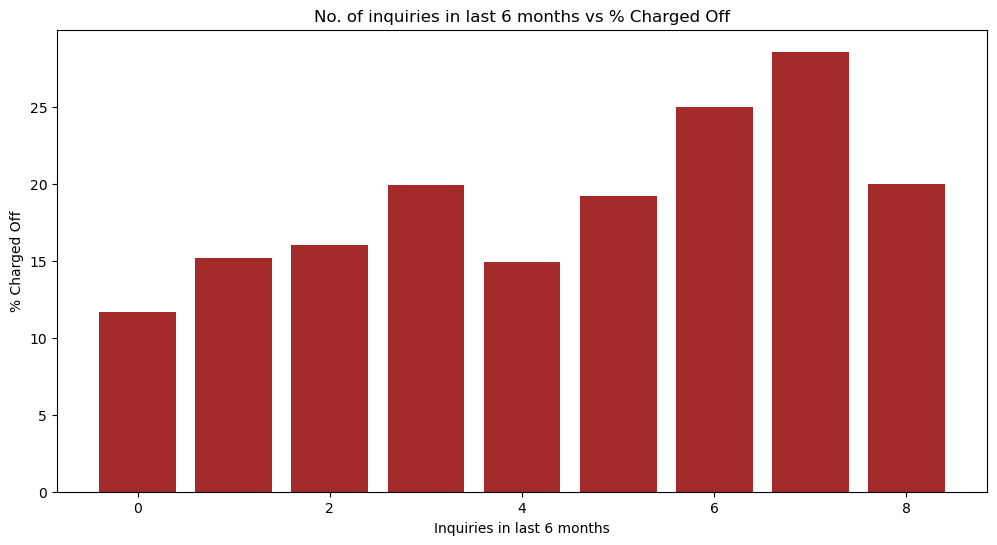

In [93]:
plt.figure(figsize=(12,6))
plt.bar(inq_cross_tab.index, inq_cross_tab['% charged off'], color='brown')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('% Charged Off')
plt.title('No. of inquiries in last 6 months vs % Charged Off')
plt.show()

Conclusion: In general, the chances of default increases with increasing no. of credit enquiries in last six months

12. open_acc: No. of open credit line for the borrower

In [94]:
# Creating a new DataFrame
loan_openacc = loan[['loan_status','open_acc']]

#Calculating the frequency table of both variables to summarise the distribution of data
openacc_cross_tab = pd.crosstab(loan_openacc.open_acc, loan_inq.loan_status)
openacc_cross_tab['% charged off'] = openacc_cross_tab.apply(lambda x: round(x[0]/(x[0]+x[1]+x[2])*100,2), axis=1)

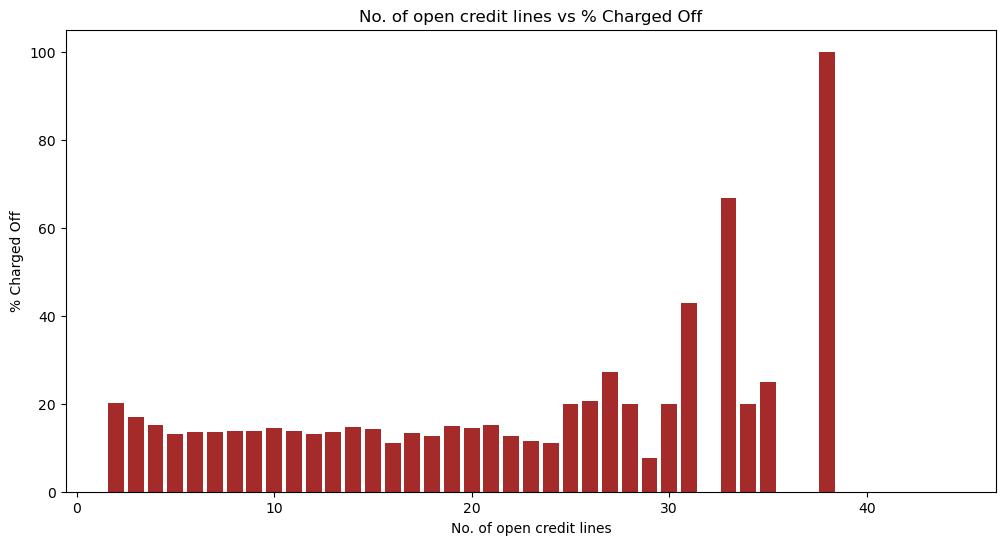

In [96]:
plt.figure(figsize=(12,6))
plt.bar(openacc_cross_tab.index, openacc_cross_tab['% charged off'], color='brown')
plt.xlabel('No. of open credit lines')
plt.ylabel('% Charged Off')
plt.title('No. of open credit lines vs % Charged Off')
plt.show()

Conclusion: The chances of default reduces as no. of open credit lines increases from 1 to 24 and increases beyond 24 credit lines

13. revol_util: Utilization of revolving line of credit 

In [98]:
# Creating a new DataFrame
loan_util = loan[['loan_status','revol_util']]


loan_util['utilization'] = loan_util.revol_util.apply(lambda x: float(x[:-1]))
loan_util.drop('revol_util', axis=1, inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\3650740458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_util['utilization'] = loan_util.revol_util.apply(lambda x: float(x[:-1]))
C:\Users\ankit\AppData\Local\Temp\ipykernel_58748\3650740458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_util.drop('revol_util', axis=1, inplace=True)


<Figure size 600x400 with 0 Axes>

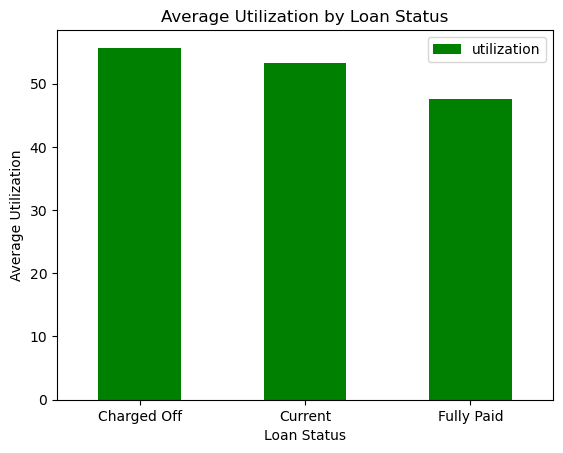

In [99]:
loan_util_group = loan_util.groupby(by='loan_status').mean()
plt.figure(figsize=(6, 4))
loan_util_group.plot(kind='bar', color='green')
plt.xlabel('Loan Status')
plt.ylabel('Average Utilization')
plt.title('Average Utilization by Loan Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

Conclusion: Borrowers with higher average utilization tends to default more